## Data Pre-processing

In [1]:
#Pakages
import pandas as pd
import numpy as np

#Visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#Import Alogorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_all=pd.read_csv("fetal_health.csv")

In [3]:
data_all.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
print(f"Columns exist in the dataset :\n{data_all.columns}")

Columns exist in the dataset :
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [5]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
data_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
missingValues = data_all.columns[data_all.isnull().any()]
print(f"Missing values in data set:\n{data_all[missingValues].isnull().sum()}")

nullValues = data_all.columns[data_all.isna().any()]
print(f"Null values in data set:\n{data_all[nullValues].isna().sum()}")

Missing values in data set:
Series([], dtype: float64)
Null values in data set:
Series([], dtype: float64)


In [8]:
data_all["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


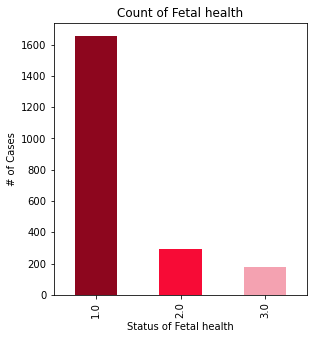

In [9]:
tot = data_all["fetal_health"].sum()
normal = tot - 471 
suspect = tot - 1831 
pathological = tot - 1950 

print(data_all["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
vis_fetal_health = data_all.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#8D061E", "#F70B36", "#F4A2B1"])
plt.title("Count of Fetal health")
plt.xlabel("Status of Fetal health")
plt.ylabel("# of Cases")

plt.show()

## Identifying Outliers

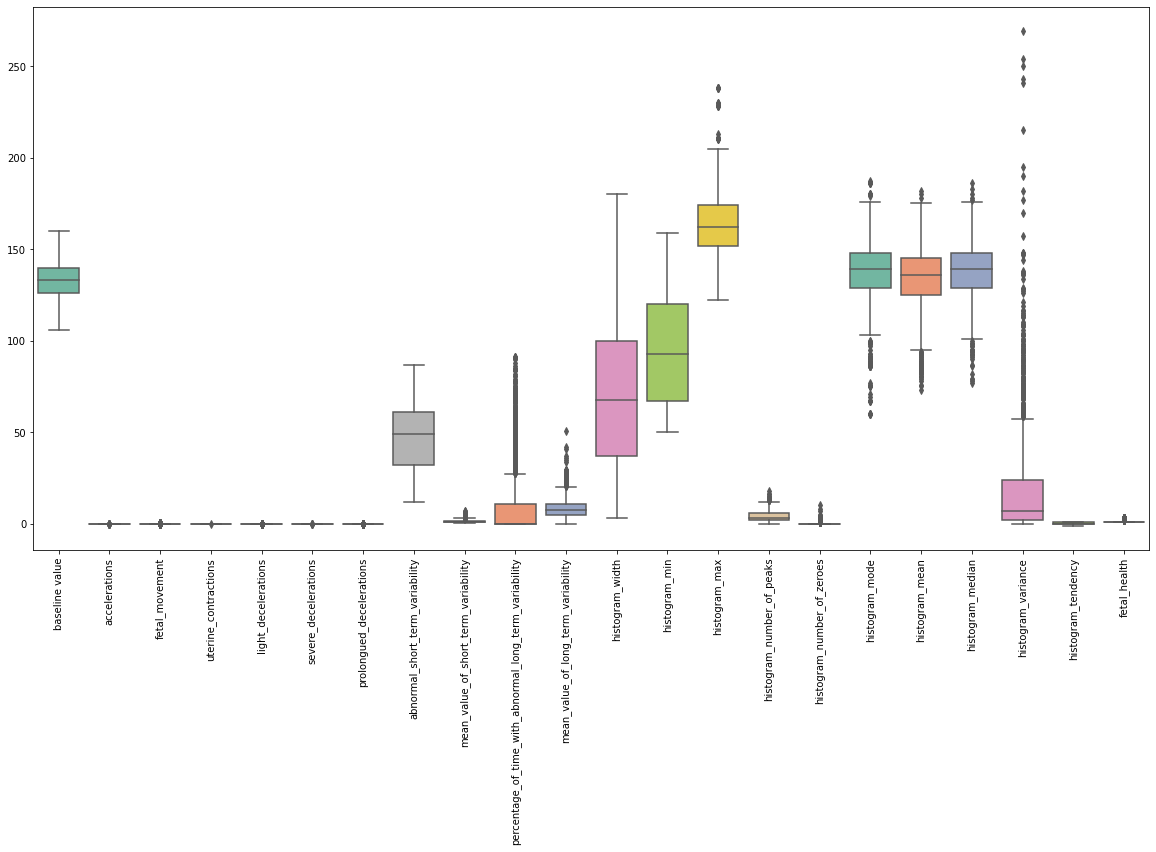

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(data = data_all, palette = "Set2")
plt.xticks(rotation = 90)
plt.show()

## Removing Outliers

In [11]:
lowerlimit = data_all.histogram_variance.mean() - 3*data_all.histogram_variance.std()
upperlimit = data_all.histogram_variance.mean() + 3*data_all.histogram_variance.std()
data_all = data_all[(data_all.histogram_variance > lowerlimit) & (data_all.histogram_variance < upperlimit)]
data_all.shape[0]

2082

In [12]:
lowerlimit = data_all.histogram_median.mean() - 3*data_all.histogram_median.std()
upperlimit = data_all.histogram_median.mean() + 3*data_all.histogram_median.std()
data_all = data_all[(data_all.histogram_median > lowerlimit) & (data_all.histogram_median < upperlimit)]
data_all.shape[0]

2065

In [13]:
lowerlimit = data_all.percentage_of_time_with_abnormal_long_term_variability.mean() - 3*data_all.percentage_of_time_with_abnormal_long_term_variability.std()
upperlimit = data_all.percentage_of_time_with_abnormal_long_term_variability.mean() + 3*data_all.percentage_of_time_with_abnormal_long_term_variability.std()
data_all = data_all[(data_all.percentage_of_time_with_abnormal_long_term_variability > lowerlimit) & (data_all.percentage_of_time_with_abnormal_long_term_variability < upperlimit)]
data_all.shape[0]

2006

In [14]:
lowerlimit = data_all.histogram_max.mean() - 3*data_all.histogram_max.std()
upperlimit = data_all.histogram_max.mean() + 3*data_all.histogram_max.std()
data_all = data_all[(data_all.histogram_max > lowerlimit) & (data_all.histogram_max < upperlimit)]
data_all.shape[0]

1992

In [15]:
lowerlimit = data_all.histogram_mode.mean() - 3*data_all.histogram_mode.std()
upperlimit = data_all.histogram_mode.mean() + 3*data_all.histogram_mode.std()
data_all = data_all[(data_all.histogram_mode > lowerlimit) & (data_all.histogram_mode < upperlimit)]
data_all.shape[0]

1975

## Begining of the KNN Model

In [16]:
col = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_of_X = StandardScaler()
X1 =  pd.DataFrame(scale_of_X.fit_transform(data_all.drop(["fetal_health"],axis = 1),), columns = col)

In [17]:
X1.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.385943,-0.847434,-0.196623,-1.523091,-0.626416,-0.031838,-0.234615,1.601387,-0.975372,2.308169,...,-0.147007,-1.101629,-2.269982,-0.695094,-0.451855,-1.412266,0.084438,-1.397082,2.779588,1.103585
1,-0.150681,0.689935,-0.196623,0.544809,0.439805,-0.031838,-0.234615,-1.720071,0.938666,-0.554834,...,1.640860,-0.895227,2.094129,0.684268,0.962430,0.154798,0.012773,0.064786,-0.179524,-0.601877
2,-0.047743,-0.078750,-0.196623,1.234109,0.439805,-0.031838,-0.234615,-1.779383,0.938666,-0.554834,...,1.640860,-0.895227,2.094129,0.339428,0.962430,0.154798,-0.058893,-0.089095,-0.131014,-0.601877
3,0.055196,-0.078750,-0.196623,1.234109,0.439805,-0.031838,-0.234615,-1.779383,1.297548,-0.554834,...,1.288704,-1.411232,0.396974,2.408470,-0.451855,-0.143690,-0.130558,-0.166035,-0.131014,1.103585
4,-0.150681,0.946163,-0.196623,1.234109,-0.626416,-0.031838,-0.234615,-1.779383,1.297548,-0.554834,...,1.288704,-1.411232,0.396974,1.718789,-0.451855,-0.143690,0.012773,-0.089095,-0.228034,1.103585


In [18]:
y1 = data_all["fetal_health"]

### Importing Train_test_split

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42, stratify = y1)

In [20]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((1382, 21), (593, 21), (1382,), (593,))

### Baseline model of K-Nearest Neighbors with default parameters:

In [21]:

knn1 = KNeighborsClassifier()
knn_mod1 = knn1.fit(X_train1, y_train1)
print(f"Baseline KNN: {round(knn_mod1.score(X_test1, y_test1), 3)}")

pred_knn1 = knn_mod1.predict(X_test1)


Baseline KNN: 0.902


### Cross validate KNN model

In [22]:

cv_method1 = StratifiedKFold(n_splits=3,shuffle=True, 
                            random_state=42
                            )

scores_knn1 = cross_val_score(knn1, X_train1, y_train1, cv = cv_method1, n_jobs = 2, scoring = "accuracy")

print(f" Cross validate scores for KNN model:\n{scores_knn1}")
print(f"Cross Value Means: {round(scores_knn1.mean(), 3)}")
print(f"Cross Value Standard Deviation: {round(scores_knn1.std(), 3)}")

 Cross validate scores for KNN model:
[0.9197397  0.89804772 0.90217391]
Cross Value Means: 0.907
Cross Value Standard Deviation: 0.009


In [23]:
params_knn1 = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [24]:
GridSearchCV_knn1 = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn1, 
                                cv=cv_method1,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

### Fiting model with train data

In [25]:

GridSearchCV_knn1.fit(X_train1, y_train1);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [26]:
best_estimator_knn1 = GridSearchCV_knn1.best_estimator_
print(f"Best estimator for K-Nearest Neighbors model:\n{best_estimator_knn1}")

Best estimator for K-Nearest Neighbors model:
KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)


In [27]:
best_params_knn1 = GridSearchCV_knn1.best_params_
print(f"Best parameter values:\n{best_params_knn1}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [28]:
best_score_knn1 = GridSearchCV_knn1.best_score_
print(f"Best score for GNB model: {round(best_score_knn1, 3)}")

Best score for GNB model: 0.916


### Testing with new parameter for KNN model

In [29]:

knn1 = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod1 = knn1.fit(X_train1, y_train1)
pred_knn1 = knn_mod1.predict(X_test1)

mse_knn1 = mean_squared_error(y_test1, pred_knn1)
rmse_knn1 = np.sqrt(mean_squared_error(y_test1, pred_knn1))
score_knn_train1 = knn_mod1.score(X_train1, y_train1)
score_knn_test1 = knn_mod1.score(X_test1, y_test1)

In [30]:
print(f"Mean Square Error for KNN  = {round(mse_knn1, 3)}")
print(f"Root Mean Square Error for KNN = {round(rmse_knn1, 3)}")
print(f"R^2 on training set = {round(score_knn_train1, 3)}")
print(f"R^2 on testing set = {round(score_knn_test1, 3)}")

Mean Square Error for KNN  = 0.118
Root Mean Square Error for KNN = 0.344
R^2 on training set = 0.957
R^2 on testing set = 0.912


In [31]:
print("Classification Report of the model")
print(classification_report(y_test1, pred_knn1))

Classification Report of the model
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95       487
         2.0       0.75      0.68      0.72        85
         3.0       0.93      0.62      0.74        21

    accuracy                           0.91       593
   macro avg       0.87      0.76      0.80       593
weighted avg       0.91      0.91      0.91       593



In [32]:
print("Confusion Matrix of the model:")
print(confusion_matrix(y_test1, pred_knn1))

Confusion Matrix of the model:
[[470  16   1]
 [ 27  58   0]
 [  5   3  13]]


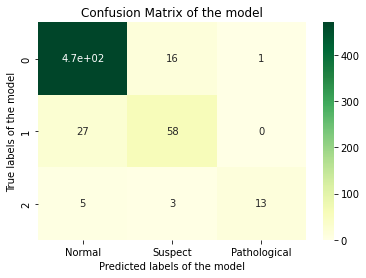

In [33]:
ax1= plt.subplot()
sns.heatmap(confusion_matrix(y_test1, pred_knn1), annot=True, ax = ax1, cmap = "YlGn");

# labels, title and ticks
ax1.set_xlabel("Predicted labels of the model");
ax1.set_ylabel("True labels of the model"); 
ax1.set_title("Confusion Matrix of the model"); 
ax1.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);